In [133]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns

In [134]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [135]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [136]:
match.shape

(1095, 20)

In [137]:
delivery.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [138]:
total_score_df = (delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index())

total_score_df['total_runs'] = total_score_df['total_runs'] + 1


In [139]:
total_score_df.shape

(2217, 3)

In [140]:
total_score_df = total_score_df[total_score_df['inning'] == 1]


In [141]:
total_score_df

,match_id,inning,total_runs
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
2207,1426307,1,215
2209,1426309,1,160
2211,1426310,1,173
2213,1426311,1,176


In [142]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on = 'id',right_on = 'match_id')

In [143]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [144]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
    'Lucknow Super Giants', 
    'Gujarat Titans'
]

In [145]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [146]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [147]:
match_df.shape

(649, 22)

In [148]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,241
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,111
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,...,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin,335987,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,1426298,2024,Kolkata,2024-05-11,League,CV Varun,"Eden Gardens, Kolkata",Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,...,runs,18.0,158.0,16.0,N,NaN,UV Gandhe,Vinod Seshan,1426298,158
1084,1426299,2024,Chennai,2024-05-12,League,Simarjeet Singh,"MA Chidambaram Stadium, Chepauk, Chennai",Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,wickets,5.0,142.0,20.0,N,NaN,R Pandit,YC Barde,1426299,142
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,160
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,176


In [149]:
 match_df = match_df[['match_id','city','winner','total_runs']]

In [150]:
delivery_df = match_df.merge(delivery, on='match_id')

In [151]:
 delivery_df = delivery_df[delivery_df['inning'] == 2]

In [156]:
delivery_df['match_id'] = delivery_df['match_id'].astype('category').cat.codes + 1


In [157]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,new_match_id
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,1
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,1
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,1
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154913,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,648
154914,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,648
154915,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,648
154916,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,648


In [158]:
delivery_df.shape

(74855, 21)

In [159]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [160]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [161]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [162]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,new_match_id,current_score,runs_left,balls_left
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,NaN,NaN,NaN,1,1,222,125
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,NaN,NaN,NaN,1,2,221,124
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,NaN,NaN,NaN,1,2,221,123
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,NaN,NaN,NaN,1,3,220,122
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,NaN,NaN,NaN,1,4,219,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154913,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,NaN,NaN,NaN,648,110,4,67
154914,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,648,111,3,66
154915,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,648,112,2,65
154916,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,NaN,NaN,NaN,648,113,1,64


In [163]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")

delivery_df['player_dismissed'] = delivery_df['dismissal_kind'].notna().astype(int)

wickets_fallen = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

delivery_df['wickets'] = 10 - wickets_fallen
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,new_match_id,current_score,runs_left,balls_left,wickets
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,1,222,125,10
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,NaN,NaN,1,2,221,124,10
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,NaN,NaN,1,2,221,123,10
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,NaN,NaN,1,3,220,122,10
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,NaN,NaN,1,4,219,121,10


In [164]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,new_match_id,current_score,runs_left,balls_left,wickets
154913,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,NaN,0,0,NaN,NaN,648,110,4,67,8
154914,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,NaN,0,0,NaN,NaN,648,111,3,66,8
154915,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,NaN,0,0,NaN,NaN,648,112,2,65,8
154916,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,NaN,0,0,NaN,NaN,648,113,1,64,8
154917,648,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,NaN,0,0,NaN,NaN,648,114,0,63,8


In [165]:
delivery_df.shape

(74855, 25)

In [166]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [167]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [168]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [169]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [170]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [171]:
final_df 

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,125,10,223,-1.200000,10.656000,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,124,10,223,-3.000000,10.693548,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,123,10,223,-4.000000,10.780488,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,122,10,223,-9.000000,10.819672,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,121,10,223,-24.000000,10.859504,0
...,...,...,...,...,...,...,...,...,...,...
154913,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,67,8,114,12.452830,0.358209,1
154914,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,66,8,114,12.333333,0.272727,1
154915,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,65,8,114,12.218182,0.184615,1
154916,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,64,8,114,12.107143,0.093750,1


In [172]:
final_df = final_df.sample(final_df.shape[0])

In [173]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
118623,Kings XI Punjab,Kolkata Knight Riders,Abu Dhabi,76,56,10,165,8.34375,8.142857,0


In [174]:
final_df.dropna(inplace=True)

In [175]:
final_df = final_df[final_df['balls_left'] != 0]

In [176]:
final_df.isna().sum()


batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [177]:
final_df['crr'] = final_df['crr'].replace([np.inf, -np.inf], np.nan)
final_df['rrr'] = final_df['rrr'].replace([np.inf, -np.inf], np.nan)


In [178]:
final_df.isna().sum()

batting_team      0
bowling_team      0
city              0
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr             596
rrr               0
result            0
dtype: int64

In [179]:
final_df = final_df.fillna(0)

In [180]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [181]:
X_train.isna().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
dtype: int64

In [182]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
87294,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,133,97,9,172,10.173913,8.226804
28614,Rajasthan Royals,Mumbai Indians,Jaipur,88,41,4,175,6.607595,12.878049
60108,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,80,81,10,131,7.846154,5.925926
100756,Kings XI Punjab,Kolkata Knight Riders,Indore,36,8,2,246,11.250000,27.000000
105893,Rajasthan Royals,Chennai Super Kings,Chennai,176,121,9,176,-0.000000,8.727273
...,...,...,...,...,...,...,...,...,...
73364,Mumbai Indians,Kings XI Punjab,Mumbai,152,79,6,178,3.804878,11.544304
150617,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,107,47,7,278,14.054795,13.659574
41327,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,109,59,5,166,5.606557,11.084746
46740,Royal Challengers Bangalore,Deccan Chargers,Bangalore,70,37,7,182,8.096386,11.351351


In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [184]:
X_train_transformed = trf.fit_transform(X_train)



In [185]:
X_train_transformed

array([[  0.        ,   0.        ,   0.        , ..., 172.        ,
         10.17391304,   8.22680412],
       [  0.        ,   0.        ,   0.        , ..., 175.        ,
          6.60759494,  12.87804878],
       [  0.        ,   0.        ,   0.        , ..., 131.        ,
          7.84615385,   5.92592593],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 166.        ,
          5.60655738,  11.08474576],
       [  0.        ,   0.        ,   0.        , ..., 182.        ,
          8.09638554,  11.35135135],
       [  0.        ,   0.        ,   0.        , ..., 172.        ,
         13.84615385,   7.96261682]], shape=(56577, 49))

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [187]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [188]:
pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('step1', ...), ('step2', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('trf', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse 

In [189]:
y_pred = pipe.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8017674089784376

In [191]:
pipe.predict_proba(X_test)[10]

array([0.7724725, 0.2275275])

In [192]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [193]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    temp_df = temp_df.replace([np.inf, -np.inf], np.nan)
    temp_df = temp_df.dropna()
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    


In [209]:
temp_df, target = match_progression(delivery_df, 100, pipe)

temp_df

Target- 184


,end_of_over,runs_after_over,wickets_in_over,lose,win
23674,1,10,0,69.0,31.0
23681,2,16,0,56.5,43.5
23687,3,15,1,59.5,40.5
23693,4,18,0,42.8,57.2
23699,5,16,0,29.1,70.9
23706,6,6,0,27.3,72.7
23712,7,6,1,39.3,60.7
23718,8,4,0,40.3,59.7
23725,9,11,0,31.7,68.3
23731,10,5,1,46.4,53.6


Text(0.5, 1.0, 'Target-184')

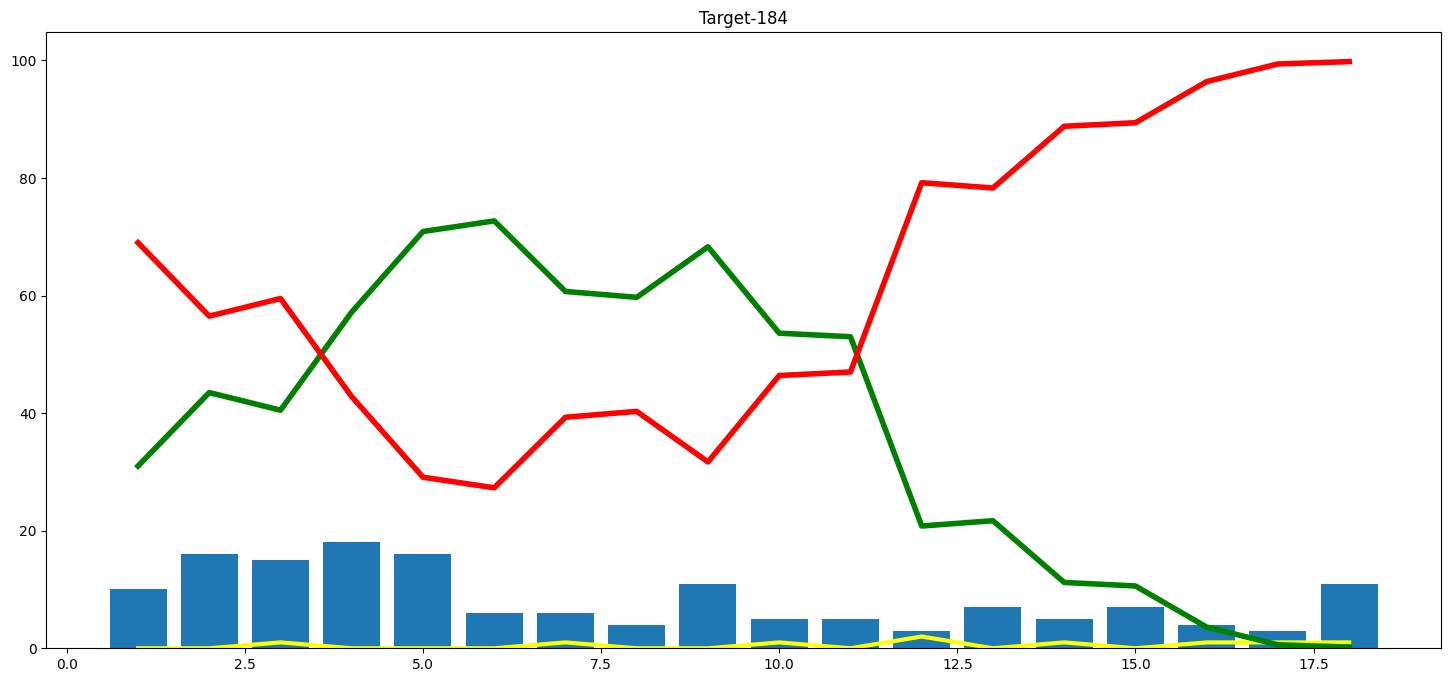

In [212]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [213]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi CapitalsLucknow Super Giants',
 'Gujarat Titans']

In [199]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Mumbai', 'Kolkata', 'Jaipur',
       'Chennai', 'Hyderabad', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Cuttack',
       'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Ranchi',
       'Delhi', 'Abu Dhabi', nan, 'Pune', 'Indore', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai'], dtype=object)

In [200]:
import pickle
pickle.dump(pipe,open('pipe_ipl.pkl','wb'))